In [1]:
from engineering import *
from processing import *
from joblib import load
import warnings
warnings.filterwarnings('ignore')
pipeline_processing = load('pipelines/processing_pipeline.joblib')
pipeline_engineering = load('pipelines/engineering_pipeline.joblib')

In [48]:
X_train = pd.read_csv('../data/orig_train.csv')

y_train = X_train['DEFAULT_FLAG']
X_train.drop(columns=['DEFAULT_FLAG'], inplace=True)


pipeline_processing.fit(X_train)
X_train = pipeline_processing.transform(X_train)
pipeline_engineering.fit(X_train)
X_train = pipeline_engineering.transform(X_train)

In [49]:
X_val = pd.read_csv('../data/orig_valid.csv')

y_val = X_val['DEFAULT_FLAG']
X_val.drop(columns=['DEFAULT_FLAG'], inplace=True)

X_val = pipeline_processing.transform(X_val)
X_val = pipeline_engineering.transform(X_val)

In [50]:
X_train = X_train.astype(float)

## Logistic Regression

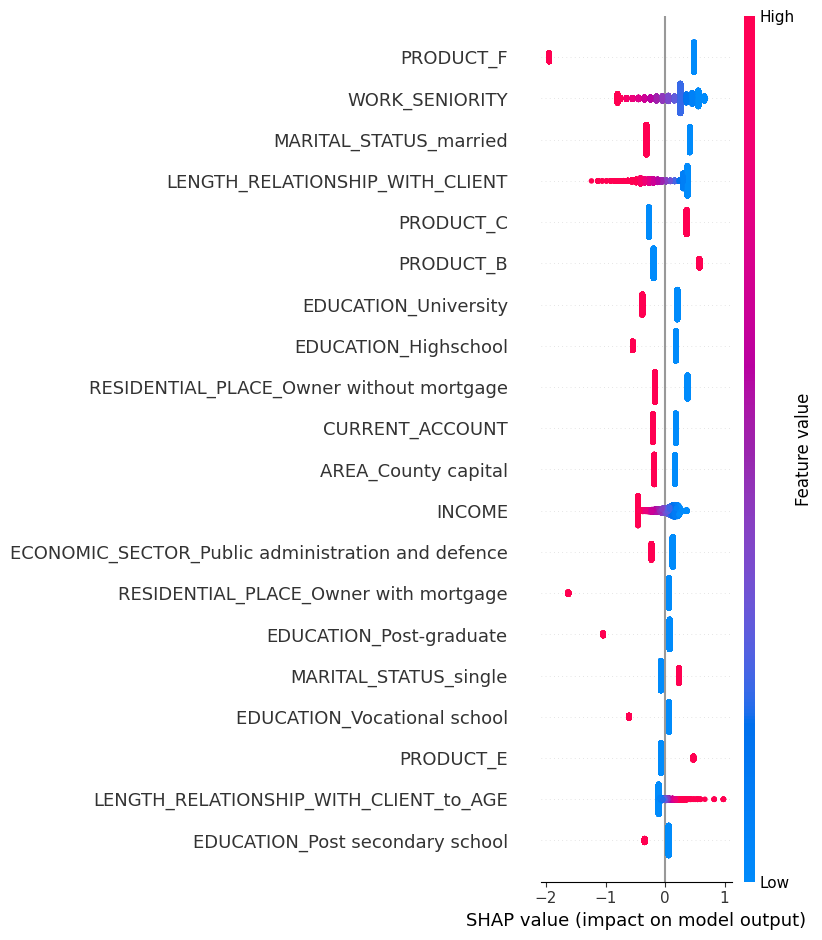

In [51]:
from sklearn.linear_model import LogisticRegression
import shap
lr = LogisticRegression()
lr.fit(X_train, y_train)
model = lr    
explainer = shap.Explainer(model, X_train)
    
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

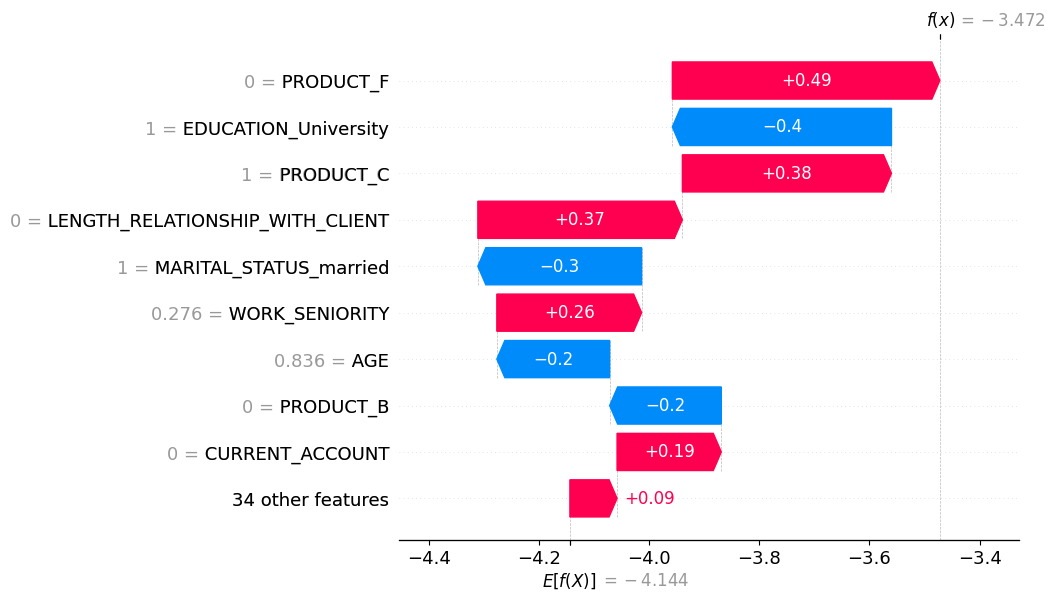

In [6]:
shap.plots.waterfall(shap_values[0])

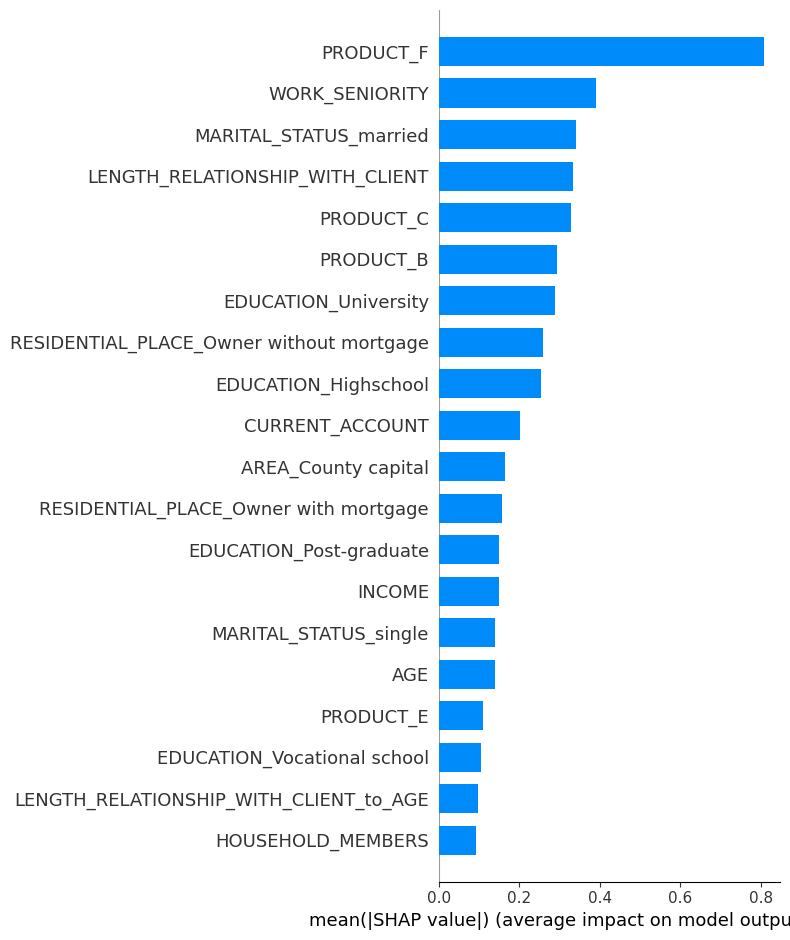

In [7]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

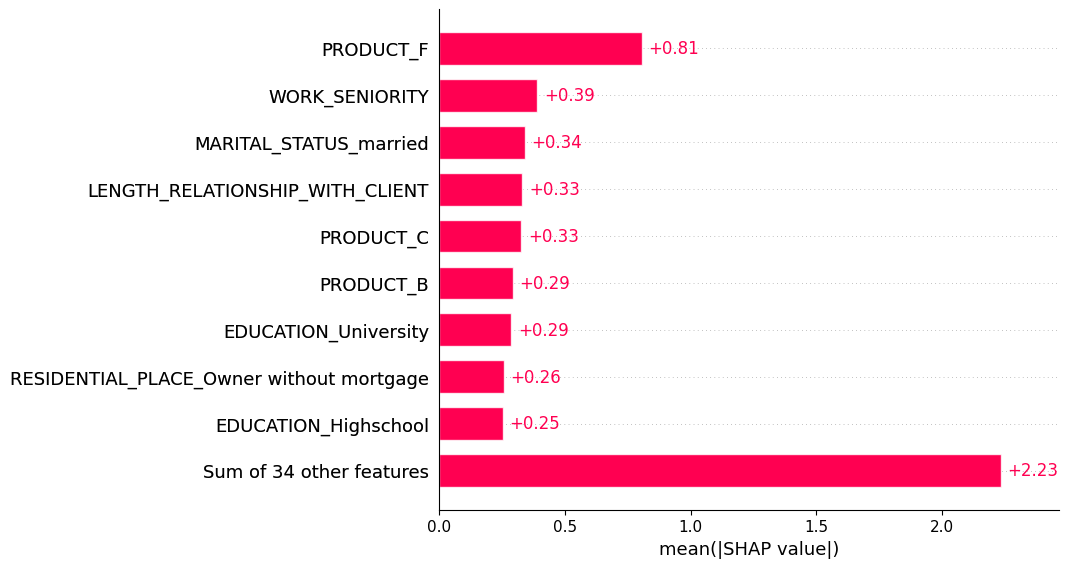

In [8]:
shap.plots.bar(shap_values)

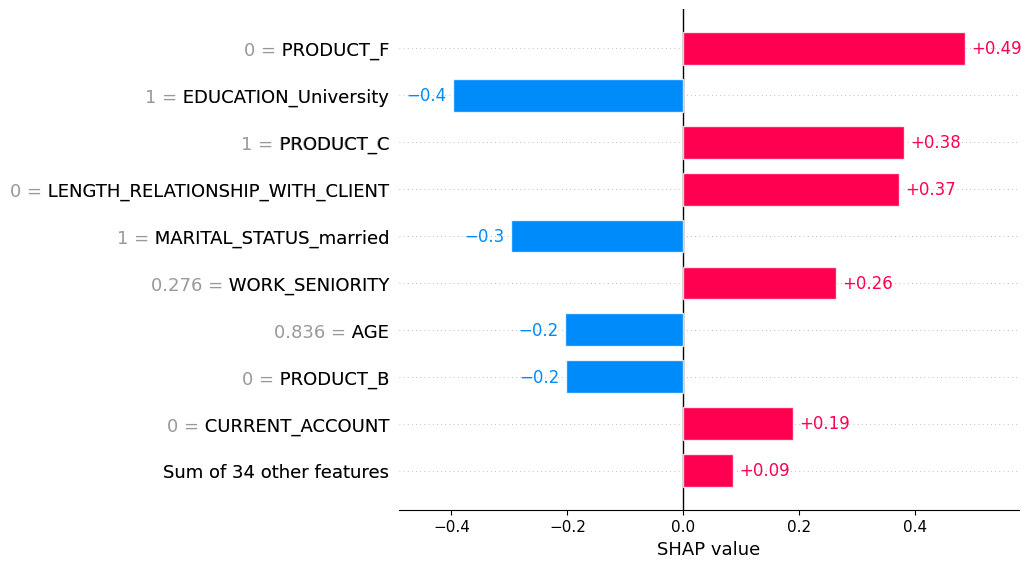

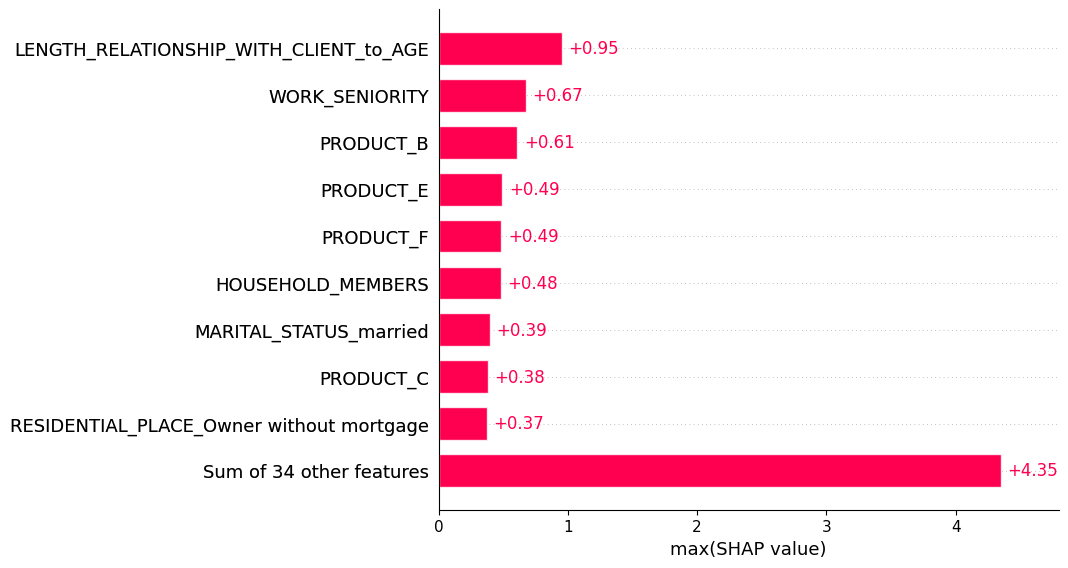

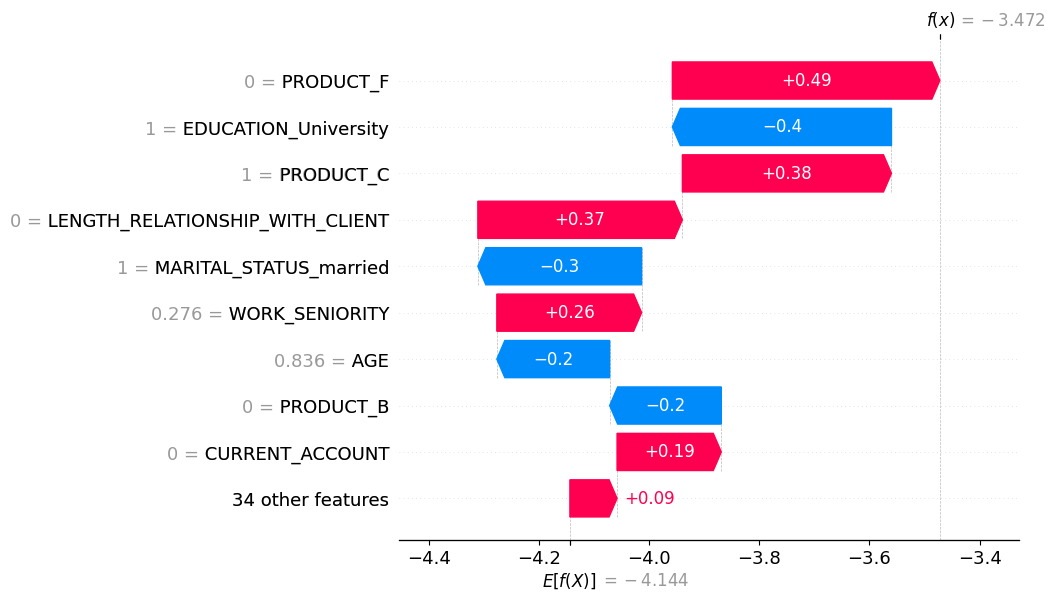

In [9]:
shap.initjs()

shap.plots.bar(shap_values[0])
shap.plots.bar(shap_values.max(axis=0))

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])
    

shap.plots.force(shap_values[0])

In [10]:
shap.plots.force(shap_values[1])

## Random Forest

TypeError: only integer scalar arrays can be converted to a scalar index

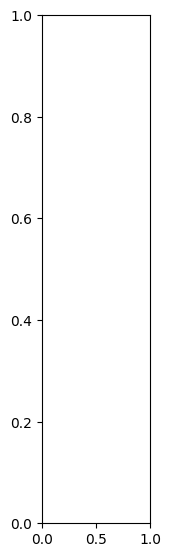

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None)
rf.fit(X_train, y_train)
model = rf    
explainer = shap.TreeExplainer(model)
    
shap_values = explainer(X_train)
shap.summary_plot(shap_values)

In [12]:
shap_values

.values =
array([[[-0.00590716,  0.00590716],
        [ 0.00574506, -0.00574506],
        [-0.00477559,  0.00477559],
        ...,
        [ 0.00129122, -0.00129122],
        [ 0.00535276, -0.00535276],
        [-0.0025747 ,  0.0025747 ]],

       [[-0.00226402,  0.00226402],
        [ 0.00328105, -0.00328105],
        [-0.00243626,  0.00243626],
        ...,
        [ 0.0010544 , -0.0010544 ],
        [ 0.00461414, -0.00461414],
        [ 0.00646389, -0.00646389]],

       [[ 0.00334282, -0.00334282],
        [ 0.00084912, -0.00084912],
        [-0.00170612,  0.00170612],
        ...,
        [ 0.00178365, -0.00178365],
        [ 0.00544547, -0.00544547],
        [-0.0023069 ,  0.0023069 ]],

       ...,

       [[ 0.0056894 , -0.0056894 ],
        [-0.00331874,  0.00331874],
        [ 0.01087146, -0.01087146],
        ...,
        [ 0.00126128, -0.00126128],
        [ 0.00859092, -0.00859092],
        [ 0.01083336, -0.01083336]],

       [[-0.00138157,  0.00138157],
        [ 0.00402

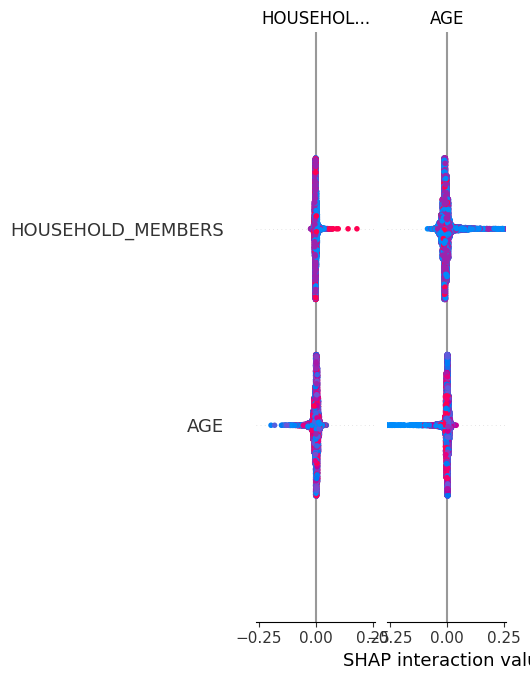

In [22]:
shap.summary_plot(shap_values.values, X_train)

In [20]:
print(type(shap_values), len(shap_values))
print([arr.shape for arr in shap_values])
print(type(X_train), X_train.shape)

<class 'shap._explanation.Explanation'> 15097
[(43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2), (43, 2),

In [28]:
base_value = explainer.expected_value[0]

single_shap_values = shap_values.values[0]

shap.plots.force(base_value, single_shap_values)

TypeError: 'numpy.float64' object is not iterable

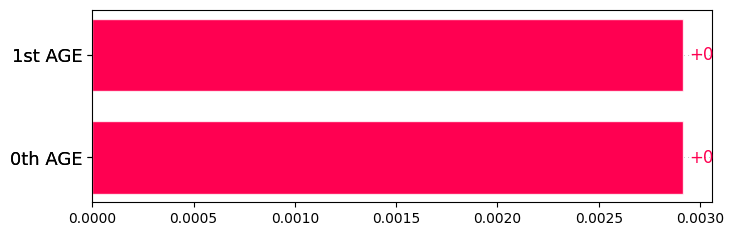

In [32]:
shap.plots.bar(shap_values[0])


TypeError: 'numpy.float64' object is not iterable

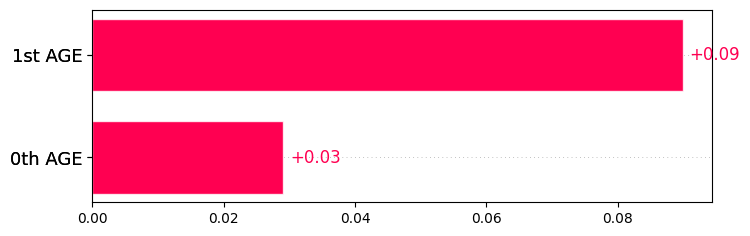

In [33]:
shap.plots.bar(shap_values.max(axis=0))

In [40]:
shap.plots.force(explainer.expected_value[0], [shap_values[0]])


TypeError: The shap_values arg looks multi output, try `shap_values[i]` instead.